In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
dat=iris.data
label=iris.target

In [3]:
from sklearn.svm import SVC
clf=SVC(probability=True)

In [4]:
from sklearn import cross_validation as cv

# CrossValidation
[公式ドキュメント](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [5]:
print(clf)
score=cv.cross_val_score(clf,dat,label,cv=5,n_jobs=-1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


> モデルのインスタンス、記述子、ラベル、分割数、ジョブ数(-1でコア数分並列)を指定


In [6]:
print("all: ",score)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

all:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Accuracy: 0.9800 (+/- 0.0163)


> scoreのデフォルトは正答率（accurary）

> 他にもあるけどマルチクラス分類では使えないのが多い。

> [参照](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

デフォルトでは単純に入力順にn分割している様子、cvにクロスバリデーション法を入力すればその方法で分割する

In [7]:
cv_method=cv.StratifiedKFold(label,shuffle=True,n_folds=5) #マルチクラスK-Fold
cv.cross_val_score(clf,dat,label,cv=cv_method,n_jobs=-1)

array([ 1.        ,  1.        ,  0.96666667,  1.        ,  0.9       ])

### SVMのコストパラメータを探索する場合

In [8]:
C_params=np.logspace(-2, 2, 9)
cv_method=cv.StratifiedKFold(label,shuffle=True,n_folds=5) 

In [9]:
scores=list()
for C in C_params:
    clf.C=C
    tmp_score=cv.cross_val_score(clf,dat,label,cv=5,n_jobs=-1)
    scores.append(np.mean(tmp_score))

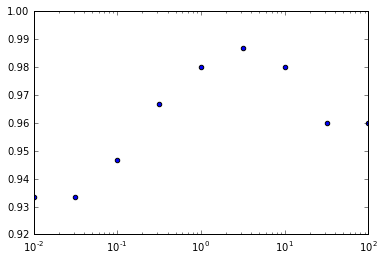

In [10]:
fig = plt.figure()
ax = plt.gca()
ax.set_xscale("log")
ax.set_xlim(0.01,100)
ax.scatter(C_params,scores)

In [11]:
C_params2=np.linspace(1,10,20)
scores2=list()
for C in C_params2:
    clf.C=C
    tmp_score=cv.cross_val_score(clf,dat,label,cv=5,n_jobs=-1)
    scores2.append(np.mean(tmp_score))

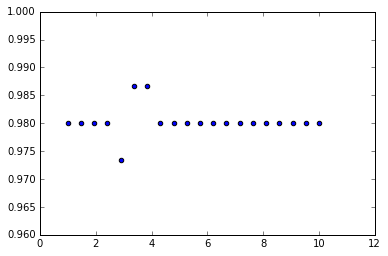

In [12]:
plt.scatter(C_params2,scores2)

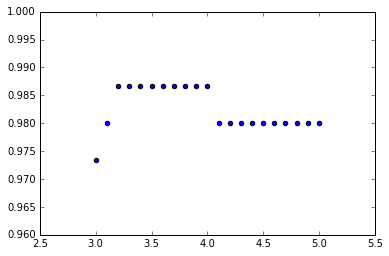

In [13]:
C_params3=np.linspace(3,5,21)
scores3=list()
for C in C_params3:
    clf.C=C
    tmp_score=cv.cross_val_score(clf,dat,label,cv=5,n_jobs=-1)
    scores3.append(np.mean(tmp_score))
plt.scatter(C_params3,scores3)

In [14]:
clf.C=3.6
score=cv.cross_val_score(clf,dat,label,cv=cv_method)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9733 (+/- 0.0249)


# おまけ
> cross_val_scoreを使わず実装するなら

In [15]:
skf=cv.StratifiedKFold(label,n_folds=5,shuffle=True) # generaterを作成する
for i in skf:pass
i # 一個一個のgeneraterにはindexのリストが含まれている

(array([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  29,  32,
         34,  35,  36,  37,  38,  39,  41,  42,  43,  44,  45,  47,  48,
         49,  53,  54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  66,
         67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  89,  90,  92,  93,  94,  95,
         97,  98, 101, 102, 104, 105, 106, 107, 108, 109, 111, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 130,
        131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 148, 149]),
 array([  2,   3,  16,  18,  28,  30,  31,  33,  40,  46,  50,  51,  52,
         59,  65,  70,  88,  91,  96,  99, 100, 103, 110, 112, 126, 127,
        129, 136, 137, 147]))

In [16]:
score=list()
for train_index,test_index in skf:
    dat_train=dat[train_index]
    dat_test=dat[test_index]
    label_train=label[train_index]
    label_test=label[test_index]
    clf.fit(dat_train,label_train)
    rslt=clf.predict(dat_test)
    tmp_score=0
    for i,j in enumerate(rslt):
        if j==label_test[i]:tmp_score+=1
    score.append(tmp_score/len(test_index))
score=np.array(score)
print("all: ",score)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

all:  [ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]
Accuracy: 0.9667 (+/- 0.0211)


# トレーニングとテスト用データの分割

> マニュアルで二分割したい時

In [17]:
dat_train,dat_test,label_train,label_test=cv.train_test_split(dat,label,train_size=0.95)

> train_sizeで0~1の範囲で分割する

> 最初に出てくるものがtrain用データ

> random_stateでseed固定も可能

> 実は分割したい配列は１つや２つだけでなく、いくつでも渡せる

In [18]:
print(len(dat_train))
print(len(dat_test))
print(len(label_train))
print(len(label_test))

142
8
142
8


In [19]:
clf.fit(dat_train,label_train)
label_pred=clf.predict(dat_test)

In [20]:
pd.DataFrame(np.c_[label_pred,label_test],columns=["prediction","fact"]).T

,0,1,2,3,4,5,6,7
prediction,0,0,2,0,1,2,2,0
fact,0,0,2,0,1,2,2,0


In [21]:
dat_train_NG,dat_test_NG=cv.train_test_split(dat,train_size=0.95)
label_train_NG,label_test_NG=cv.train_test_split(label,train_size=0.95) #上とseedが違う可能性あり!!
clf.fit(dat_train_NG,label_train_NG)
label_pred_NG=clf.predict(dat_test_NG)
pd.DataFrame(np.c_[label_pred_NG,label_test_NG],columns=["prediction","fact"]).T

,0,1,2,3,4,5,6,7
prediction,1,2,1,2,1,1,0,1
fact,0,0,0,0,0,0,0,1


> random_stateを指定せずに分割するときは一文でないと、ばらばらなseedでランダム分割されるので注意